## **小麦とチェス盤問題**

曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話があります。これを題材に多次元配列を扱うための数値計算ライブラリ NumPy の使い方に慣れていきます。  
8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。

**◇少ないマスで考える**  
まずは4マスの板に小麦の粒を並べていくことを考えます。配列（リスト）の1つの要素を1つのマスに見立てています。


Pythonのリストとfor文を使い次のように作ることができます。  
《サンプルコード》

In [1]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

このリストにnp.array()を使うことで、ndarrayを作成することができます。

In [2]:
import numpy as np
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


***

**【問題1】2×2マスのチェス盤の小麦の数**  
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。


サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [3]:
board_2_2_ndarray = small_board_ndarray.reshape(2, 2)
print("2×2マスのチェス盤をndarrayによって表現すると、\n{}".format(board_2_2_ndarray))

2×2マスのチェス盤をndarrayによって表現すると、
[[1 2]
 [4 8]]


***

**【問題2】n×mマスへの拡張**  
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [4]:
def create_n_m_ndarray(n, m):
    """
    nとmを与えると、n×mマスのチェス盤の小麦の数を記したndarrayを返す関数
    
    Parameter
    ----------
    n：int
    m：int
    
    Return
    ---------
    n_m_ndarray：n×mマスのチェス盤の小麦の数を記したndarray
    """
    #ndarrayの元となるリストを作成する
    squares = n*m
    squares_list = []
    for i in range(squares):
        squares_list.append(2**i)
    
    #ndarrayを作成する
    n_m_ndarray = np.array(squares_list)
    
    #ndarrayをn×mに変形する
    n_m_ndarray = n_m_ndarray.reshape(n, m)
    
    return n_m_ndarray

In [5]:
np.set_printoptions(precision=2) #小数点以下の表示桁数を2桁に
#np.get_printoptions() #現在の表示形式の確認

board_8_8_ndarray = create_n_m_ndarray(8, 8)
print("8×8マスのチェス盤の小麦の数を記したndarrayは、\n{}".format(board_8_8_ndarray))

8×8マスのチェス盤の小麦の数を記したndarrayは、
[[1.00e+00 2.00e+00 4.00e+00 8.00e+00 1.60e+01 3.20e+01 6.40e+01 1.28e+02]
 [2.56e+02 5.12e+02 1.02e+03 2.05e+03 4.10e+03 8.19e+03 1.64e+04 3.28e+04]
 [6.55e+04 1.31e+05 2.62e+05 5.24e+05 1.05e+06 2.10e+06 4.19e+06 8.39e+06]
 [1.68e+07 3.36e+07 6.71e+07 1.34e+08 2.68e+08 5.37e+08 1.07e+09 2.15e+09]
 [4.29e+09 8.59e+09 1.72e+10 3.44e+10 6.87e+10 1.37e+11 2.75e+11 5.50e+11]
 [1.10e+12 2.20e+12 4.40e+12 8.80e+12 1.76e+13 3.52e+13 7.04e+13 1.41e+14]
 [2.81e+14 5.63e+14 1.13e+15 2.25e+15 4.50e+15 9.01e+15 1.80e+16 3.60e+16]
 [7.21e+16 1.44e+17 2.88e+17 5.76e+17 1.15e+18 2.31e+18 4.61e+18 9.22e+18]]


***

**【問題3】小麦の数の合計**  
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

In [6]:
print("合計は{}".format(board_8_8_ndarray.sum()))

合計は1.8446744073709552e+19


In [7]:
print("各列の平均は{}".format(board_8_8_ndarray.mean(axis=0)))

各列の平均は[9.04e+15 1.81e+16 3.62e+16 7.23e+16 1.45e+17 2.89e+17 5.79e+17 1.16e+18]


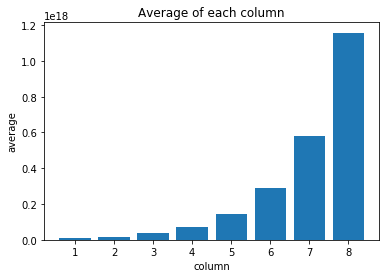

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("average")
plt.title("Average of each column")
plt.bar(np.arange(1, 8+1), board_8_8_ndarray.mean(axis=0))
plt.show()

***

**【問題4】小麦の数のヒートマップ**  
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。  

ヒートマップとはデータを可視化するために、行列型の数字データの強弱を色で視覚化する方法です。値が小さいところが紫、大きいところが黄色になっています。

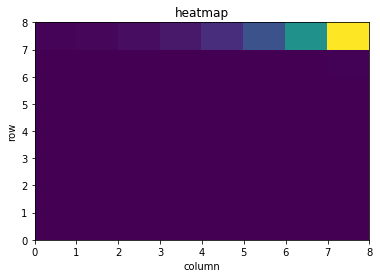

In [9]:
plt.xlabel("column") #列
plt.ylabel("row") #行
plt.title("heatmap")
plt.pcolor(board_8_8_ndarray)
plt.show()

***

**【問題5】後半は前半の何倍か**  
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [10]:
#前半の小麦数
front_half = board_8_8_ndarray[:4, :].sum()

#後半の小麦数
back_half = board_8_8_ndarray[4:8, :].sum()


print("{}倍".format(back_half/front_half))

4294967296.0倍


***

**【補足】**  
●「Pythonのリスト+for文」以外でndarrayを作成する方法

In [11]:
# np.append()
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [12]:
#ブロードキャスト
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


●ndarrayの型

In [13]:
n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808

最後のマスの小麦の数：-9223372036854775808


/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


最後の64マス目が-9223372036854775808と負の数になり明らかに間違っています。このndarrayの型を見ると、次のように int64 です。

In [14]:
print(board_ndarray.dtype) # .dtype

int64


int64は64ビットの整数型で、-9,223,372,036,854,775,808 ~ 9,223,372,036,854,775,807 の範囲の整数値しか扱えないことを示しています。この値は -2の64乗から2の64乗-1 です。そのため、2の64乗になる64マス目の値が範囲外となり、負の値として出てきてしまっているのです。


Pythonの整数型（int）にはこのような制限がありませんが、ndarrayは高速な計算が行える反面、こういった制約があり、型で扱える範囲を意識しておく必要があります。


今回は正の値しか利用しないため、 uint64 を使用することで解決します。 0 ~ 18,446,744,073,709,551,615 を扱うことができます。astypeメソッドを使うことで型を変換できるので、累乗の計算前にこれを使いndarrayをuint64型にしておきます。

In [15]:
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64) #astypeメソッド
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

最後のマスの小麦の数：9223372036854775808


***

**【問題6】他の計算方法によるn×mマスへの拡張**  
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。


それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

●np.append()

In [16]:
def append_n_m_ndarray(n, m):
    n_squares = n*m
    n_m_ndarray = np.array([]) #空のndarray作成可能
    
    for i in range(n_squares):
        n_m_ndarray = np.append(n_m_ndarray, 2**i)
        
    n_m_ndarray = n_m_ndarray.reshape(n, m)
    return n_m_ndarray

In [17]:
print(append_n_m_ndarray(8, 8))
print(append_n_m_ndarray(8, 8).dtype)

[[1.00e+00 2.00e+00 4.00e+00 8.00e+00 1.60e+01 3.20e+01 6.40e+01 1.28e+02]
 [2.56e+02 5.12e+02 1.02e+03 2.05e+03 4.10e+03 8.19e+03 1.64e+04 3.28e+04]
 [6.55e+04 1.31e+05 2.62e+05 5.24e+05 1.05e+06 2.10e+06 4.19e+06 8.39e+06]
 [1.68e+07 3.36e+07 6.71e+07 1.34e+08 2.68e+08 5.37e+08 1.07e+09 2.15e+09]
 [4.29e+09 8.59e+09 1.72e+10 3.44e+10 6.87e+10 1.37e+11 2.75e+11 5.50e+11]
 [1.10e+12 2.20e+12 4.40e+12 8.80e+12 1.76e+13 3.52e+13 7.04e+13 1.41e+14]
 [2.81e+14 5.63e+14 1.13e+15 2.25e+15 4.50e+15 9.01e+15 1.80e+16 3.60e+16]
 [7.21e+16 1.44e+17 2.88e+17 5.76e+17 1.15e+18 2.31e+18 4.61e+18 9.22e+18]]
float64


●ブロードキャスト

In [18]:
def bloadcast_n_m_ndarray(n, m):
    indices_ndarray = np.arange(n*m).astype(np.float64)
    n_m_ndarray = 2**indices_ndarray
    
    n_m_ndarray = n_m_ndarray.reshape(n, m)
    return n_m_ndarray

#自動でdtypeがint64型になってしまったので、.astype(np.float64)を追加した
#.astype(np.float64)をreshape()の行に挿入すると、ndarrayを表示させた時の各要素間のスペースの数が変わった

In [19]:
print(bloadcast_n_m_ndarray(8, 8))
print(bloadcast_n_m_ndarray(8, 8).dtype)

[[1.00e+00 2.00e+00 4.00e+00 8.00e+00 1.60e+01 3.20e+01 6.40e+01 1.28e+02]
 [2.56e+02 5.12e+02 1.02e+03 2.05e+03 4.10e+03 8.19e+03 1.64e+04 3.28e+04]
 [6.55e+04 1.31e+05 2.62e+05 5.24e+05 1.05e+06 2.10e+06 4.19e+06 8.39e+06]
 [1.68e+07 3.36e+07 6.71e+07 1.34e+08 2.68e+08 5.37e+08 1.07e+09 2.15e+09]
 [4.29e+09 8.59e+09 1.72e+10 3.44e+10 6.87e+10 1.37e+11 2.75e+11 5.50e+11]
 [1.10e+12 2.20e+12 4.40e+12 8.80e+12 1.76e+13 3.52e+13 7.04e+13 1.41e+14]
 [2.81e+14 5.63e+14 1.13e+15 2.25e+15 4.50e+15 9.01e+15 1.80e+16 3.60e+16]
 [7.21e+16 1.44e+17 2.88e+17 5.76e+17 1.15e+18 2.31e+18 4.61e+18 9.22e+18]]
float64


***

**【問題7】計算時間の比較**  
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。


%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [20]:
%%timeit
create_n_m_ndarray(8, 8) #Pythonのリスト + for文

23.8 µs ± 458 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%%timeit
append_n_m_ndarray(8, 8) # np.append()

206 µs ± 3.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
%%timeit
bloadcast_n_m_ndarray(8, 8) #ブロードキャスト

3.1 µs ± 55.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


※$µs=10^{-6}$, $ns=10^{-9}$  

計算速度の比較  
「ブロードキャスト」＜「Pythonリスト+for文」＜ 「np.append()」  
  
●考察  
①ブロードキャスト  
指数のndarrayを作成 → ブロードキャストでndarray更新 → reshape

②Pythonのリスト+for文  
空のリストを作成 → for文でリストにappend → リストをndarrayへ変換 → reshape
  
③np.append()  
空のndarrayを作成 → for文でndarrayにappend → reshape  

②と③を比較すると、  
②はリストをndarrayに変換するという工程が余計にあるにも関わらず、③の方が約8倍も遅いので、  
「for文でndarrayにappendする」のは余程時間が掛かるということがわかる。  
①はfor文やappendを使っていないため処理が早いと考えられる。